<a href="https://colab.research.google.com/github/cwkim0120/covid-19-mobility-predict-model/blob/main/covid_19_mobility%26prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# Korea Mobility Data 분석 및 시각화

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [3]:
from google.colab import drive 
drive.mount('/content/gdrive/')
df = pd.read_csv('//content/gdrive/MyDrive/tmp/mobility_report/2020_KR_Region_Mobility_Report.csv')
etc = pd.read_csv('//content/gdrive/MyDrive/tmp/mobility_report/2021_KR_Region_Mobility_Report.csv')

Mounted at /content/gdrive/


In [4]:
df.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,KR,South Korea,etc,NaN,NaN,NaN,NaN,ChIJm7oRy-tVZDURS9uIugCbJJE,2020-02-15,-4,0,3,-6,1,3
1,KR,South Korea,etc,NaN,NaN,NaN,NaN,ChIJm7oRy-tVZDURS9uIugCbJJE,2020-02-16,-11,0,-31,-15,-3,4
2,KR,South Korea,etc,NaN,NaN,NaN,NaN,ChIJm7oRy-tVZDURS9uIugCbJJE,2020-02-17,-7,-6,-17,-6,0,5
3,KR,South Korea,etc,NaN,NaN,NaN,NaN,ChIJm7oRy-tVZDURS9uIugCbJJE,2020-02-18,-1,-3,-5,-3,2,2
4,KR,South Korea,etc,NaN,NaN,NaN,NaN,ChIJm7oRy-tVZDURS9uIugCbJJE,2020-02-19,-5,-1,14,-4,1,2


In [5]:
# A new column 'month_name'
#df['month'] = pd.DatetimeIndex(df['date']).month_name()
df['month'] = pd.DatetimeIndex(df['date']).month

In [6]:
df1 = df[['sub_region_1','month','retail_and_recreation_percent_change_from_baseline', 
         'grocery_and_pharmacy_percent_change_from_baseline',
         'parks_percent_change_from_baseline', 
         'transit_stations_percent_change_from_baseline',
         'workplaces_percent_change_from_baseline',
         'residential_percent_change_from_baseline' ]]

In [7]:
df1 = df1.rename({'retail_and_recreation_percent_change_from_baseline': 'retail_recreation', 
                'grocery_and_pharmacy_percent_change_from_baseline': 'grocery_pharmacy',
                 'parks_percent_change_from_baseline':'park', 'workplaces_percent_change_from_baseline':'workspace', 
                  'residential_percent_change_from_baseline':'residential', 
                  'transit_stations_percent_change_from_baseline':'transit_station'}, axis=1)

In [8]:
df1.shape

(642, 8)

In [9]:
df1

,sub_region_1,month,retail_recreation,grocery_pharmacy,park,transit_station,workspace,residential
0,etc,2,-4,0,3,-6,1,3
1,etc,2,-11,0,-31,-15,-3,4
2,etc,2,-7,-6,-17,-6,0,5
3,etc,2,-1,-3,-5,-3,2,2
4,etc,2,-5,-1,14,-4,1,2
...,...,...,...,...,...,...,...,...
637,etc,12,-39,-12,22,-30,-26,12
638,etc,12,-21,12,31,-15,-17,11
639,etc,12,-22,4,-3,-16,-18,11
640,etc,12,-30,1,-20,-24,-20,13


In [10]:
qld = df1[df1['sub_region_1'] == "etc"]

In [11]:
qld = qld.groupby(['month','sub_region_1']).mean().reset_index()

In [12]:
qld

,month,sub_region_1,retail_recreation,grocery_pharmacy,park,transit_station,workspace,residential
0,2,etc,-19.066667,-5.033333,-7.566667,-15.433333,-4.066667,6.566667
1,3,etc,-22.854839,-2.161290,23.193548,-19.370968,-7.951613,8.209677
2,4,etc,-13.683333,5.300000,44.066667,-11.716667,-8.533333,6.333333
3,5,etc,-6.032258,10.903226,48.870968,-5.983871,-7.032258,3.951613
4,6,etc,-6.150000,8.950000,39.916667,-5.233333,-2.466667,2.166667
5,7,etc,-6.064516,6.306452,38.112903,-7.500000,-3.532258,2.306452
6,8,etc,-14.306452,5.419355,23.032258,-15.387097,-14.419355,5.209677
7,9,etc,-20.000000,11.750000,38.283333,-12.033333,-12.333333,5.250000
8,10,etc,-12.000000,9.016129,55.209677,-0.354839,-10.435484,2.580645
9,11,etc,-14.450000,6.166667,15.583333,-2.266667,-3.166667,2.366667


In [13]:
qld = qld.drop(columns=['sub_region_1'])
qld = qld.set_index('month')
qld

,retail_recreation,grocery_pharmacy,park,transit_station,workspace,residential
month,,,,,,
2,-19.066667,-5.033333,-7.566667,-15.433333,-4.066667,6.566667
3,-22.854839,-2.161290,23.193548,-19.370968,-7.951613,8.209677
4,-13.683333,5.300000,44.066667,-11.716667,-8.533333,6.333333
5,-6.032258,10.903226,48.870968,-5.983871,-7.032258,3.951613
6,-6.150000,8.950000,39.916667,-5.233333,-2.466667,2.166667
7,-6.064516,6.306452,38.112903,-7.500000,-3.532258,2.306452
8,-14.306452,5.419355,23.032258,-15.387097,-14.419355,5.209677
9,-20.000000,11.750000,38.283333,-12.033333,-12.333333,5.250000
10,-12.000000,9.016129,55.209677,-0.354839,-10.435484,2.580645


In [14]:
valid_markers = ([item[0] for item in mpl.markers.MarkerStyle.markers.items() if
item[1] is not 'nothing' and not item[1].startswith('tick') and not item[1].startswith('caret')])
 
# valid_markers = mpl.markers.MarkerStyle.filled_markers
 
markers = np.random.choice(valid_markers, qld.shape[1], replace=False)

<>:2: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:2: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-14-1bf7cb06d3e2>:2: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  item[1] is not 'nothing' and not item[1].startswith('tick') and not item[1].startswith('caret')])


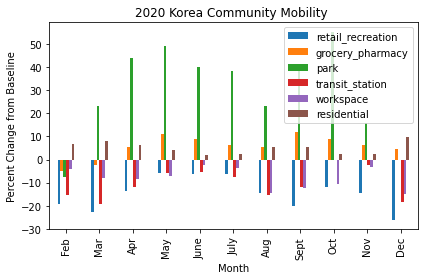

In [15]:
ax = qld.plot(kind='bar')
for i, line in enumerate(ax.get_lines()):
    line.set_marker(markers[i])

# adding legend
ax.legend(qld.columns, loc='best')
plt.ylabel('Percent Change from Baseline')
plt.xlabel('Month')
plt.title('2020 Korea Community Mobility ')
labels = ['Feb', 'Mar', 'Apr', 'May', 'June','July','Aug','Sept','Oct','Nov','Dec']
ax.set_xticklabels(labels)
plt.tight_layout()
plt.savefig('qld.png')
plt.show()

# Korea Covid-19 Data 분석 및 시각화

In [16]:
covid = pd.read_csv('//content/gdrive/MyDrive/tmp/mobility_report/covid_korea.csv')
covid.head()

,DATE,CONFIRM,RELEASE,QUARANT,DEATH,TOTAL_TEST,UNDER_TEST,NEGATIVE,AVAR16,AVAR1,...,GYEONGGI,GANGWON,CHUNGBUK,CHUNGNAM,JEONBUK,JEONNAM,GYEONGBUK,GYEONGNAM,JEJU,Lazaretto
0,20JAN20,1,0,1,0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,21JAN20,1,0,1,0,NaN,NaN,NaN,NaN,0.0,...,0,0,0,0,0,0,0,0,0,0
2,22JAN20,1,0,1,0,NaN,NaN,NaN,NaN,0.0,...,0,0,0,0,0,0,0,0,0,0
3,23JAN20,1,0,1,0,NaN,NaN,NaN,NaN,0.0,...,0,0,0,0,0,0,0,0,0,0
4,24JAN20,2,0,2,0,NaN,NaN,NaN,NaN,1.0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
Jan = covid.loc[covid['DATE'].str.contains("JAN20")]
Feb = covid.loc[covid['DATE'].str.contains("FEB20")]
Mar = covid.loc[covid['DATE'].str.contains("MAR20")]
Apr = covid.loc[covid['DATE'].str.contains("APR20")]
May = covid.loc[covid['DATE'].str.contains("MAY20")]
Jun = covid.loc[covid['DATE'].str.contains("JUN20")]
Jul = covid.loc[covid['DATE'].str.contains("JUL20")]
Aug = covid.loc[covid['DATE'].str.contains("AUG20")]
Sep = covid.loc[covid['DATE'].str.contains("SEP20")]
Oct = covid.loc[covid['DATE'].str.contains("OCT20")]
Nov = covid.loc[covid['DATE'].str.contains("NOV20")]
Dec = covid.loc[covid['DATE'].str.contains("DEC20")]

data를 보고싶은 월 입력(ex.1,3): 3


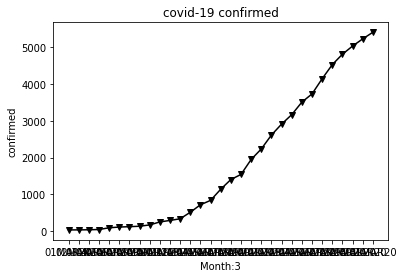

In [20]:
a = int(input("data를 보고싶은 월 입력(ex.1,3): "))
if a == 1:
  DATE = Jan.DATE
  RELEASE = Jan.RELEASE
  DEATH = Jan.DEATH
elif a == 2:
  DATE = Feb.DATE
  RELEASE = Feb.RELEASE
  DEATH = Feb.DEATH
elif a == 3:
  DATE = Mar.DATE
  RELEASE = Mar.RELEASE
  DEATH = Mar.DEATH
elif a == 4:
  DATE = Apr.DATE
  RELEASE = Apr.RELEASE
  DEATH = Apr.DEATH
elif a == 5:
  DATE = May.DATE
  RELEASE = May.RELEASE
  DEATH = May.DEATH
elif a == 6:
  DATE = June.DATE
  RELEASE = June.RELEASE
  DEATH = June.DEATH
elif a == 7:
  DATE = July.DATE
  RELEASE = July.RELEASE
  DEATH = July.DEATH
elif a == 8:
  DATE = Aug.DATE
  RELEASE = Aug.RELEASE
  DEATH = Aug.DEATH
elif a == 9:
  DATE = Sep.DATE
  RELEASE = Sep.RELEASE
  DEATH = Sep.DEATH
elif a == 10:
  DATE = Oct.DATE
  RELEASE = Oct.RELEASE
  DEATH = Oct.DEATH
elif a == 11:
  DATE = Nov.DATE
  RELEASE = Nov.RELEASE
  DEATH = Nov.DEATH
elif a == 12:
  DATE = Dec.DATE
  RELEASE = Dec.RELEASE
  DEATH = Dec.DEATH
  
plt.plot(DATE, RELEASE, color = 'black', marker = 'v', linestyle = 'solid')
plt.title('covid-19 confirmed')
plt.ylabel('confirmed')
plt.xlabel("Month:"+str(a))
plt.show()

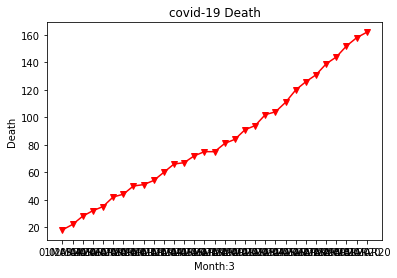

In [21]:
plt.plot(DATE, DEATH, color = 'red', marker = 'v', linestyle = 'solid')
plt.title('covid-19 Death')
plt.ylabel('Death')
plt.xlabel("Month:"+str(a))
plt.show()

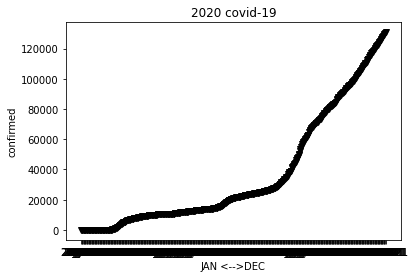

In [22]:
DATE = covid.DATE
RELEASE = covid.RELEASE
DEATH = covid.DEATH
plt.plot(DATE, RELEASE, color = 'black',marker = 'v', linestyle = 'dotted')
plt.title('2020 covid-19')
plt.ylabel('confirmed')
plt.xlabel('JAN <-->DEC')
plt.show()

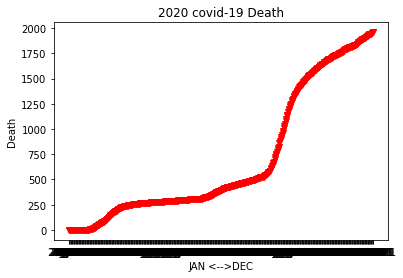

In [23]:
plt.plot(DATE, DEATH, color = 'red', marker = 'v', linestyle = 'solid')
plt.title('2020 covid-19 Death')
plt.ylabel('Death')
plt.xlabel('JAN <-->DEC')
plt.show()

# seq2seq를 이용한 covid-19 예측 모델

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from google.colab import drive 
drive.mount('/content/gdrive/')
data = pd.DataFrame(pd.read_csv('//content/gdrive/MyDrive/tmp/mobility_report/train.csv'))
data

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


,Id,County,Province_State,Country_Region,Population,Weight,Date,Target,TargetValue
0,1,NaN,NaN,Afghanistan,27657145,0.058359,2020-01-23,ConfirmedCases,0.0
1,2,NaN,NaN,Afghanistan,27657145,0.583587,2020-01-23,Fatalities,0.0
2,3,NaN,NaN,Afghanistan,27657145,0.058359,2020-01-24,ConfirmedCases,0.0
3,4,NaN,NaN,Afghanistan,27657145,0.583587,2020-01-24,Fatalities,0.0
4,5,NaN,NaN,Afghanistan,27657145,0.058359,2020-01-25,ConfirmedCases,0.0
...,...,...,...,...,...,...,...,...,...
824189,969594,NaN,NaN,Zimbabwe,14240168,0.607106,2020-05-18,Fatalities,0.0
824190,969595,NaN,NaN,Zimbabwe,14240168,0.060711,2020-05-19,ConfirmedCases,0.0
824191,969596,NaN,NaN,Zimbabwe,14240168,0.607106,2020-05-19,Fatalities,0.0
824192,969597,NaN,NaN,Zimbabwe,14240168,0.060711,2020-05-20,ConfirmedCases,2.0


In [28]:
countries = data['Country_Region'].unique()
data_by_country=[]
for c in countries:
    c_data = data.loc[data['Country_Region'] == c]
    c_data_cases = c_data.loc[c_data['Target'] == 'ConfirmedCases']
    c_data_cases = c_data_cases.loc[c_data_cases['Population'] == c_data_cases['Population'].values.max()]
    c_data_cases_percent_pop = c_data_cases['TargetValue'].values/c_data_cases['Population'].values.max()*100
    data_by_country.append(c_data_cases_percent_pop)
    #plt.plot(c_data_cases_percent_pop, label = c)
    #plt.legend()
    #plt.show()

In [29]:
np.where(countries=="US")

(array([173]),)

예측모델 사용전 train데이터의 국가 중 국가봉쇄(lockdown)를 실시한 국가들을 scoring (2020년기준)

자료:https://www.politico.eu/article/europes-coronavirus-lockdown-measures-compared/

정리된 자료가 유럽에 한정되어 기타국가는 찾지 못하였습니다.

In [30]:
import numpy as np
score = np.zeros((len(countries),1))

ind = np.where(countries=='Italy')
score[ind]=5-9

ind = np.where(countries=='France') 
score[ind]=4

ind = np.where(countries=='Spain')
score[ind]=6-4

ind = np.where(countries=='United Kingdom')
score[ind]=4-8

ind = np.where(countries=='Belgium')
score[ind]=5-2

ind = np.where(countries=='Germany')
score[ind]=4-8

ind = np.where(countries=='Greece') 
score[ind]=5

ind = np.where(countries=='Poland')
score[ind]=5

ind = np.where(countries=='Sweden')
score[ind]=1

ind = np.where(countries=='Austria') 
score[ind]=4

ind = np.where(countries=='Portugal')
score[ind]=5

ind = np.where(countries=='Hungary')
score[ind]=5

ind = np.where(countries=='Czechia') 
score[ind]=5

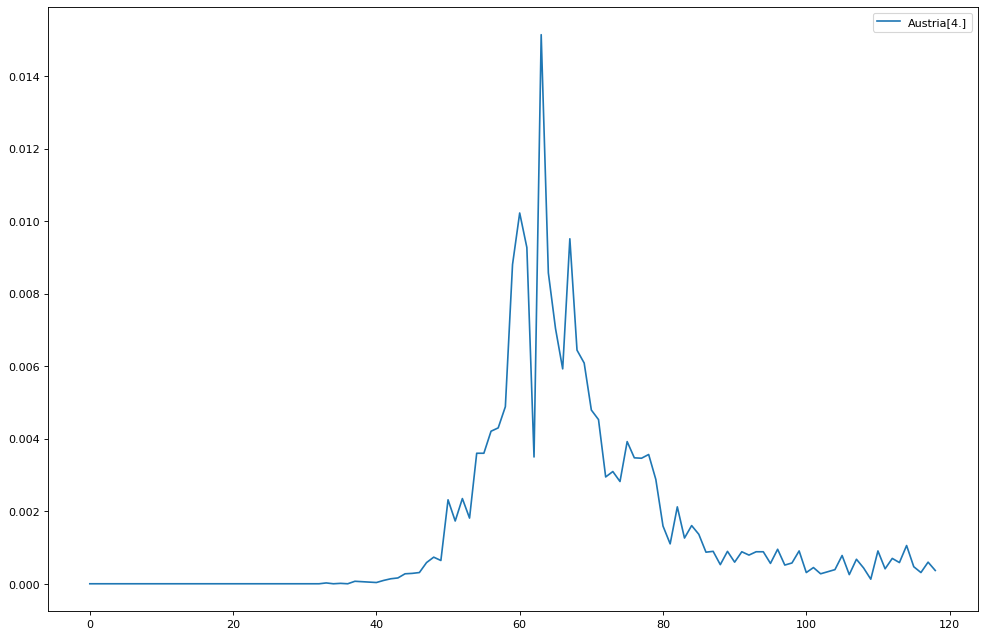

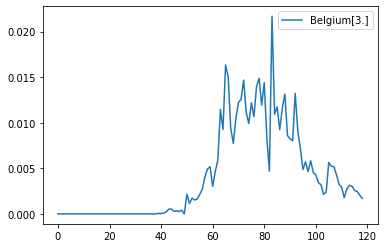

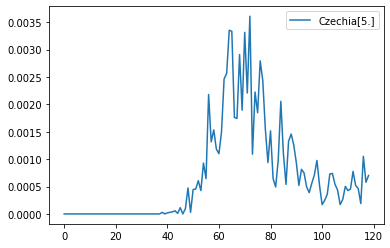

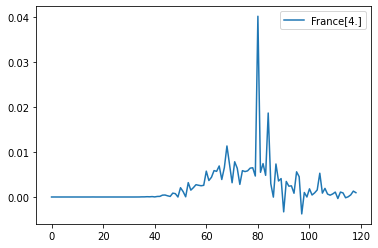

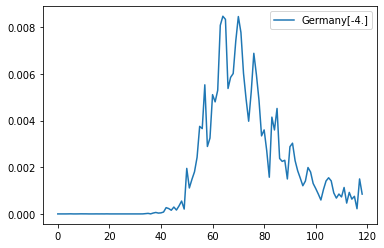

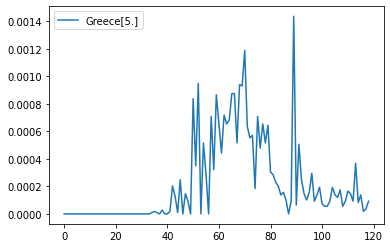

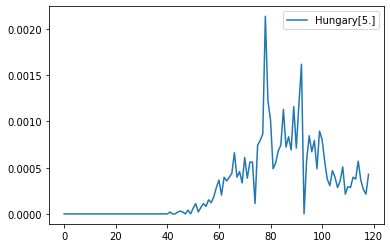

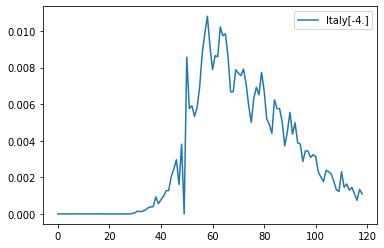

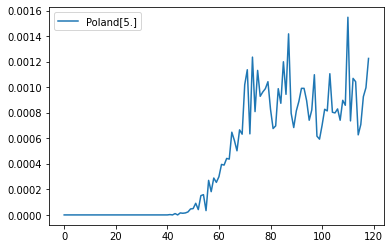

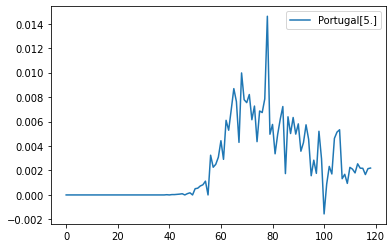

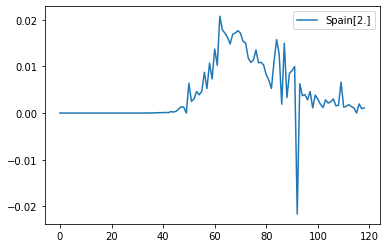

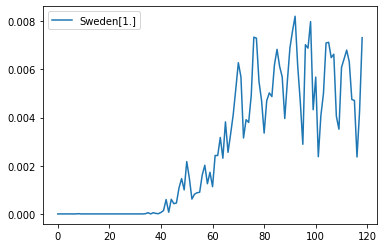

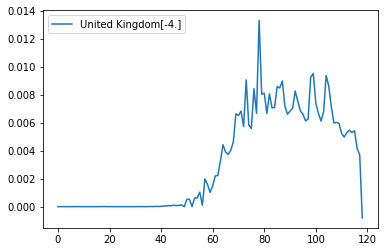

In [31]:
fig=plt.figure(figsize=(15, 10), dpi= 80, facecolor='w', edgecolor='k')
ind = np.where(score!=0)
scores = score[ind[0]]
labeled_data = []
for i in ind[0]:
    labeled_data.append(data_by_country[i])
    plt.plot(data_by_country[i], label = countries[i]+ str(score[i]))
    #plt.title(score[i])
    plt.legend()
    plt.show()

labeled_data= np.vstack(labeled_data)

# Predict score based on data

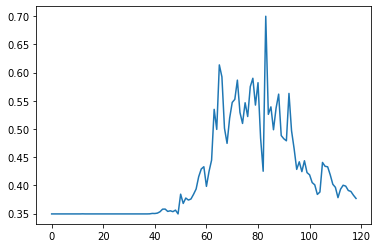

In [32]:
import torch
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
maxval = labeled_data.max()
minval = labeled_data.min()
normalized=(labeled_data-minval)/(maxval-minval)
plt.plot(normalized[1])
train_data = normalized[1:]

In [33]:
def create_inout_sequences(input_data, labels):
    inout_seq = []
    for i in range(len(labels)):
        train_seq = torch.FloatTensor(input_data[i]).view(-1)
        train_label = torch.FloatTensor(labels[i]).view(-1)
        inout_seq.append((train_seq ,train_label))
    return inout_seq
train_inout_seq =create_inout_sequences(train_data, scores[1:])

In [34]:
import torch.nn as nn

class LSTM(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=50, output_size=1):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size

        self.lstm = nn.LSTM(input_size, hidden_layer_size)

        self.linear = nn.Linear(hidden_layer_size, output_size)

        self.hidden_cell = (torch.zeros(1,1,self.hidden_layer_size),
                            torch.zeros(1,1,self.hidden_layer_size))

    def forward(self, input_seq):
        lstm_out, self.hidden_cell = self.lstm(input_seq.view(len(input_seq) ,1, -1), self.hidden_cell)
        predictions = self.linear(lstm_out.view(len(input_seq), -1))
        return predictions[-1]

In [35]:
model = LSTM()
loss_function = nn.L1Loss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [36]:
epochs = 20
losses=[]
for i in range(epochs):
    for seq, labels in train_inout_seq:
        optimizer.zero_grad()
        model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size),
                        torch.zeros(1, 1, model.hidden_layer_size))
        y_pred = model(seq)

        single_loss = loss_function(y_pred, labels)
        losses.append(single_loss)
        single_loss.backward()
        optimizer.step()
    #if i%25 == 1:
        print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')

print(f'epoch: {i:3} loss: {single_loss.item():10.10f}')

epoch:   0 loss: 2.88673306
epoch:   0 loss: 4.87268877
epoch:   0 loss: 3.85708570
epoch:   0 loss: 4.15839958
epoch:   0 loss: 4.83640814
epoch:   0 loss: 4.82753420
epoch:   0 loss: 4.18366766
epoch:   0 loss: 4.81139469
epoch:   0 loss: 4.80293989
epoch:   0 loss: 1.79540730
epoch:   0 loss: 0.77898824
epoch:   0 loss: 4.22759056
epoch:   1 loss: 2.76485944
epoch:   1 loss: 4.75788164
epoch:   1 loss: 3.74701047
epoch:   1 loss: 4.26516485
epoch:   1 loss: 4.72832775
epoch:   1 loss: 4.71817541
epoch:   1 loss: 4.29472780
epoch:   1 loss: 4.69822025
epoch:   1 loss: 4.68688393
epoch:   1 loss: 1.67706633
epoch:   1 loss: 0.65508479
epoch:   1 loss: 4.35494375
epoch:   2 loss: 2.63489676
epoch:   2 loss: 4.62478065
epoch:   2 loss: 3.60839438
epoch:   2 loss: 4.41084480
epoch:   2 loss: 4.57857943
epoch:   2 loss: 4.56179571
epoch:   2 loss: 4.46049547
epoch:   2 loss: 4.52769041
epoch:   2 loss: 4.50748444
epoch:   2 loss: 1.48755074
epoch:   2 loss: 0.44673020
epoch:   2 loss: 4.5

19

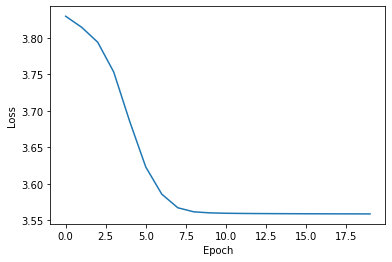

In [37]:
losses=[float(i) for i in losses]
lossperepoch  =[]
sep=int(len(losses)/epochs)
c=0
for i in range(0,len(losses),sep):
    lossperepoch.append(sum(losses[c*sep:c*sep+sep]))
    c=c+1
plt.plot(range(0,epochs),np.log(lossperepoch))
plt.ylabel("Loss")
plt.xlabel("Epoch")
np.argmin(lossperepoch)

In [38]:
model.eval()
seq = torch.FloatTensor(torch.FloatTensor(labeled_data[0]).view(-1))
with torch.no_grad():
    model.hidden = (torch.zeros(1, 1, model.hidden_layer_size),
                        torch.zeros(1, 1, model.hidden_layer_size))
    out=model(seq).item()
print(out)
print(scores[0])

3.2819457054138184
[4.]


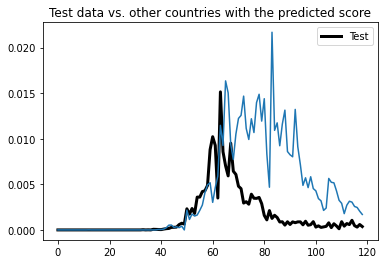

In [39]:
ind = np.where(scores==3.) 
plt.plot(labeled_data[0], label='Test', linewidth = 3, color = 'black')
plt.plot(labeled_data[ind[0][0]])
#plt.plot(labeled_data[ind[0][1]])
#plt.plot(labeled_data[ind[0][2]])
#plt.plot(labeled_data[ind[0][3]])
#plt.plot(labeled_data[ind[0][4]])
#plt.plot(labeled_data[ind[0][5]])
plt.legend()
plt.title("Test data vs. other countries with the predicted score")
plt.show()

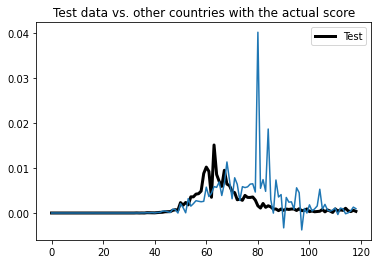

In [40]:
ind = np.where(scores==4.) 
plt.plot(labeled_data[0], label='Test', linewidth = 3, color = 'black')
#plt.plot(labeled_data[ind[0][0]], label='With actual score')
plt.plot(labeled_data[ind[0][1]])
#plt.plot(labeled_data[ind[0][2]])
#plt.plot(labeled_data[ind[0][3]])
#plt.plot(labeled_data[ind[0][4]])
#plt.plot(labeled_data[ind[0][5]])
#plt.plot(labeled_data[ind[0][6]])
plt.legend()
plt.title("Test data vs. other countries with the actual score")
plt.show()

# 여러 국가와 비교

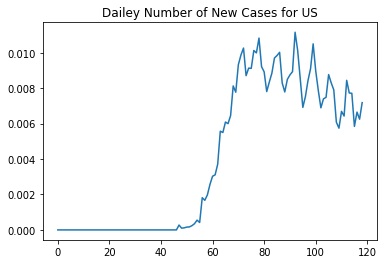

In [41]:
US_data = data.loc[data['Country_Region'] == 'US']
US_data_cases = US_data.loc[US_data['Target'] == 'ConfirmedCases']
US_data_cases = US_data_cases.loc[US_data_cases['Population'] == 324141489]
plt.plot(US_data_cases['TargetValue'].values/324141489*100)
plt.title("Dailey Number of New Cases for US")
plt.show()

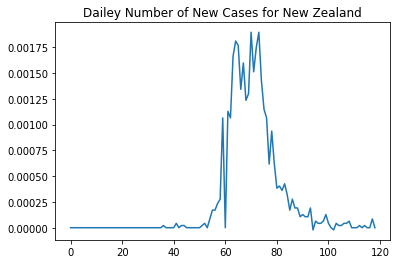

In [42]:
NZ_data = data.loc[data['Country_Region'] == 'New Zealand']
NZ_data_cases = NZ_data.loc[NZ_data['Target'] == 'ConfirmedCases']
NZ_data_cases = NZ_data_cases.loc[NZ_data_cases['Population'] == NZ_data_cases['Population'].values.max()]
plt.plot(NZ_data_cases['TargetValue'].values/NZ_data_cases['Population'].values.max()*100)
plt.title("Dailey Number of New Cases for New Zealand")
plt.show()

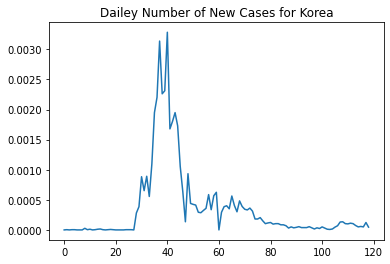

In [43]:
KR_data = data.loc[data['Country_Region'] == 'Korea, South']
KR_data_cases = KR_data.loc[KR_data['Target'] == 'ConfirmedCases']
KR_data_cases = KR_data_cases.loc[KR_data_cases['Population'] == 25281000] #train.csv의 한국인구수가 잘못 설정되어 있었습니다. value를 나눌때는 올바른 인구수로 입력하였습니다.
plt.plot(KR_data_cases['TargetValue'].values/51821669*200)
plt.title("Dailey Number of New Cases for Korea")
plt.show()

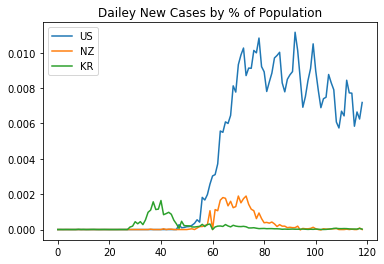

In [44]:
plt.plot(US_data_cases['TargetValue'].values/324141489*100, label='US')
plt.plot(NZ_data_cases['TargetValue'].values/NZ_data_cases['Population'].values.max()*100, label='NZ')
plt.plot(KR_data_cases['TargetValue'].values/51821669*100, label='KR')
plt.title("Dailey New Cases by % of Population")
plt.legend()
plt.show()

# Seq2Seq 예측 모델

In [45]:
from keras.models import Model
from keras.layers import Input, LSTM, Dense
from keras.optimizers import Adam
import warnings
warnings.filterwarnings("ignore")


latent_dim = 50 # LSTM hidden units
dropout = .20 

encoder_inputs = Input(shape=(None, 1)) 
encoder = LSTM(latent_dim, dropout=dropout, return_state=True)
encoder_outputs, state_h, state_c = encoder(encoder_inputs)

encoder_states = [state_h, state_c]

decoder_inputs = Input(shape=(None, 1)) 

decoder_lstm = LSTM(latent_dim, dropout=dropout, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs,initial_state=encoder_states)

decoder_dense = Dense(1) 
decoder_outputs = decoder_dense(decoder_outputs)

model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

In [46]:
def transform_series_encode(series_array):
    series_mean = series_array.mean(axis=1).reshape(-1,1) 
    series_array = series_array #- series_mean
    series_array = series_array.reshape((series_array.shape[0],series_array.shape[1], 1))
    
    return series_array, series_mean

def transform_series_decode(series_array, encode_series_mean):
    series_array = series_array - np.zeros([len(encode_series_mean),1])#encode_series_mean
    series_array = series_array.reshape((series_array.shape[0],series_array.shape[1], 1))
    
    return series_array

In [47]:
data_as_array= np.load('//content/gdrive/MyDrive/tmp/mobility_report/npy_file.npy')
def create_endoder_target_pairs(data):
    e_data = []
    t_data = []
    if len(data)!=119:
        for i in range(len(data)):
            e_data.append(data[i][0:-40])
            t_data.append(data[i][-40:])
    else:
        e_data.append(data[0:-40])
        t_data.append(data[-40:])
    return [np.array(e_data),np.array(t_data)]
[e_data,t_data]=create_endoder_target_pairs(data_as_array[0:-1])

In [48]:
encoder_input_data = e_data
encoder_input_data, encode_series_mean = transform_series_encode(encoder_input_data)

decoder_target_data = t_data
decoder_target_data = transform_series_decode(decoder_target_data, encode_series_mean)

In [49]:
batch_size = 2**11
epochs = 100

encoder_input_data = e_data
encoder_input_data, encode_series_mean = transform_series_encode(encoder_input_data)

decoder_target_data = t_data
                                            
decoder_target_data = transform_series_decode(decoder_target_data, encode_series_mean)

decoder_input_data = np.zeros(decoder_target_data.shape)
decoder_input_data[:,1:,0] = decoder_target_data[:,:-1,0]
decoder_input_data[:,0,0] = encoder_input_data[:,-1,0]

model.compile(Adam(), loss='mean_absolute_error')
history = model.fit([encoder_input_data, decoder_input_data], decoder_target_data,
                     batch_size=batch_size,
                     epochs=epochs,
                     validation_split=0.2);

Epoch 1/100
1/1 [==============================] - 6s 6s/step - loss: 0.3659 - val_loss: 0.3419
Epoch 2/100
1/1 [==============================] - 0s 102ms/step - loss: 0.3394 - val_loss: 0.3147
Epoch 3/100
1/1 [==============================] - 0s 96ms/step - loss: 0.3124 - val_loss: 0.2872
Epoch 4/100
1/1 [==============================] - 0s 96ms/step - loss: 0.2834 - val_loss: 0.2596
Epoch 5/100
1/1 [==============================] - 0s 94ms/step - loss: 0.2570 - val_loss: 0.2316
Epoch 6/100
1/1 [==============================] - 0s 94ms/step - loss: 0.2290 - val_loss: 0.2049
Epoch 7/100
1/1 [==============================] - 0s 92ms/step - loss: 0.2001 - val_loss: 0.1784
Epoch 8/100
1/1 [==============================] - 0s 98ms/step - loss: 0.1726 - val_loss: 0.1559
Epoch 9/100
1/1 [==============================] - 0s 113ms/step - loss: 0.1531 - val_loss: 0.1406
Epoch 10/100
1/1 [==============================] - 0s 97ms/step - loss: 0.1425 - val_loss: 0.1371
Epoch 11/100
1/1 [=

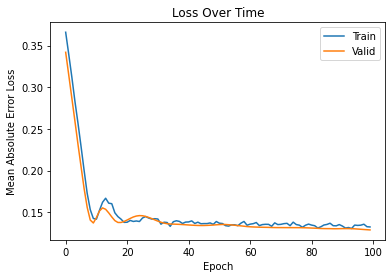

In [50]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error Loss')
plt.title('Loss Over Time')
plt.legend(['Train','Valid'])

In [51]:
encoder_model = Model(encoder_inputs, encoder_states)

decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

decoder_outputs, state_h, state_c = decoder_lstm(decoder_inputs, initial_state=decoder_states_inputs)
decoder_states = [state_h, state_c]

decoder_outputs = decoder_dense(decoder_outputs)
decoder_model = Model([decoder_inputs] + decoder_states_inputs,
                      [decoder_outputs] + decoder_states)

def decode_sequence(input_seq):
    
    states_value = encoder_model.predict(input_seq)

    target_seq = np.zeros((1, 1, 1))
    target_seq[0, 0, 0] = input_seq[0, -1, 0]

    decoded_seq = np.zeros((1,pred_steps,1))
    
    for i in range(pred_steps):
        
        output, h, c = decoder_model.predict([target_seq] + states_value)
        
        decoded_seq[0,i,0] = output[0,0,0]

        target_seq = np.zeros((1, 1, 1))
        target_seq[0, 0, 0] = output[0,0,0]

        states_value = [h, c]

    return decoded_seq

In [52]:
[e_data,t_data]=create_endoder_target_pairs(data_as_array[-1])
encoder_input_data = e_data
encoder_input_data, encode_series_mean = transform_series_encode(encoder_input_data)

decoder_target_data = t_data
decoder_target_data = transform_series_decode(decoder_target_data, encode_series_mean)

1/1 [==============================] - 0s 41ms/step


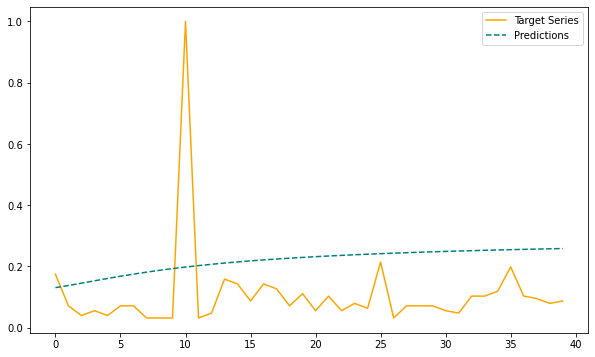

In [53]:
pred_steps=len(t_data[0])
def predict_and_plot(encoder_input_data, decoder_target_data, sample_ind, enc_tail_len=51):
    encode_series = encoder_input_data[sample_ind:sample_ind+1] 
    pred_series = decode_sequence(encode_series)
    
    encode_series = encode_series.reshape(-1,1)
    pred_series = pred_series.reshape(-1,1)   
    target_series = decoder_target_data.reshape(-1,1) 
    encode_series_tail = np.concatenate([encode_series[-enc_tail_len:],target_series[:1]])
    x_encode = encode_series_tail.shape[0]
    
    plt.figure(figsize=(10,6))  
    plt.plot(target_series,color='orange')
    plt.plot(pred_series,color='teal',linestyle='--')
    
    #plt.title('Encoder Series Tail of Length %d, Target Series, and Predictions' % enc_tail_len)
    plt.legend(['Target Series','Predictions'])
    return pred_series
preds= predict_and_plot(encoder_input_data, decoder_target_data, 0)